In [1]:
%matplotlib inline

In [1]:
from iuvs import meta

/Users/klay6683/miniconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from pathlib import Path
# root = Path('/home/klay6683/to_keep')
root = Path('/Users/klay6683/data/iuvs')
# df = pd.read_hdf('/home/klay6683/to_keep/l1a_dark_scan.h5', 'df')
df = pd.read_hdf(str(root / 'l1a_dark_scan.h5'), 'df')

## using previously defined clean up function

In [3]:
df = meta.clean_up_dark_scan(df)

#### creating little checking function:

In [4]:
def check_values(col):
    return df[col.upper()].value_counts(dropna=False)

## filter further down
remove cruise and transition and only consider 3 int_times for now

In [5]:
df = df[df.COLLECTION_ID!='cruise']

df = df[df.COLLECTION_ID!='transition']

df = df[df.INT_TIME.isin([14400, 4200, 1400])]

## load HK data

In [6]:
from iuvs import hk

hkdb = pd.read_hdf(str(root / 'HK_DB.h5'), 'df')


### pick a time resolution

In [7]:
timeres = '1s'

### resample

In [8]:
newind = pd.DatetimeIndex(start=hkdb.index[0].replace(microsecond=0),
                 end=hkdb.index[-1], freq='1s')

In [9]:
snew=pd.Series(1, newind)
sold = pd.Series(2, hkdb.index)
smerged=pd.concat([snew,sold])
smerged = smerged.sort_index()
reindexed = hkdb.reindex(smerged.index)
reindexed.head()

,FUV_CHIP_TEMP_C,FUV_DET_TEMP_C,FUV_INT_TEMP_C,GRAT_MOT_TEMP_C,HV_POWR_TEMP_C,IUVS_1_TEMP_C,IUVS_2_TEMP_C,IUVS_3_TEMP_C,IUVS_4_TEMP_C,IUVS_5_TEMP_C,...,MUV_DET_TEMP_C,MUV_INT_TEMP_C,OP_1_HTR_TEMP_C,OP_2_HTR_TEMP_C,POWER_BD1_TEMP_C,POWER_BD2_TEMP_C,PROC_BD_TEMP_C,SCAN_MOT_TEMP_C,ZONE_1_HTR_TEMP_C,ZONE_2_HTR_TEMP_C
2013-12-16 00:00:27.000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-16 00:00:27.110313951,6.7534,7.743806,5.947079,27.915505,30.65817,24.283262,28.417406,24.945137,27.340724,-57.437199,...,7.829424,5.908708,2.655265,-11.086761,-7.396871,-9.342501,-9.712488,24.21937,26.494905,26.26658
2013-12-16 00:00:28.000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-16 00:00:29.000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-16 00:00:30.000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
hkfuvtemp = reindexed.FUV_DET_TEMP_C.interpolate(method='time')
hkmuvtemp = reindexed.MUV_DET_TEMP_C.interpolate(method='time')

In [11]:
hkfuvtemp.tail()

2015-08-11 19:30:54.000000000   -20.355654
2015-08-11 19:30:55.000000000   -20.355654
2015-08-11 19:30:56.000000000   -20.355654
2015-08-11 19:30:57.000000000   -20.355654
2015-08-11 19:30:57.949607491   -20.355654
Name: FUV_DET_TEMP_C, dtype: float64

In [12]:
g = df.groupby(['CHANNEL', 'INT_TIME', 'activity', 'BINNING_SET'])

In [13]:
size = g.size()

In [14]:
i = size[size>4000].index

In [15]:
i.get_level_values('BINNING_SET')

Index([  (0, 4, 89, 115),   (52, 8, 89, 80),   (0, 4, 96, 115),
       (140, 4, 96, 115), (140, 8, 101, 80)],
      dtype='object', name='BINNING_SET')

In [16]:
size[size>4000]

CHANNEL  INT_TIME  activity  BINNING_SET      
FUV      4200      periapse  (0, 4, 89, 115)      8484
         14400     apoapse   (52, 8, 89, 80)      5468
MUV      4200      periapse  (0, 4, 96, 115)      4030
                             (140, 4, 96, 115)    4830
         14400     apoapse   (140, 8, 101, 80)    5334
dtype: int64

In [31]:
%matplotlib inline

In [32]:
for key, content in g:
    resampled = content.resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hkfuvtemp
    else:
        resampled['HK_TEMP'] = hkmuvtemp
    title = '_'.join([str(i) for i in key])
    print(title)
    fig, ax = plt.subplots(nrows=2)
    resampled.plot(kind='scatter', x='DET_TEMP', y='mean', ax=ax[0],
                 xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' vs DET_TEMP')

    resampled.plot(kind='scatter', x='HK_TEMP', y='mean', ax=ax[1],
                 xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' vs HK_TEMP')
    fig.tight_layout()
    fig.savefig('plots/'+title+'.png', dpi=150)
    plt.close(fig)

FUV_1400_outbound_(0, 3, 880, 3)
FUV_1400_outbound_(52, 4, 89, 115)
FUV_1400_outbound_(52, 8, 89, 115)
FUV_1400_outlimb_(0, 4, 89, 115)
FUV_1400_outlimb_(52, 4, 89, 115)
FUV_1400_outlimb_(52, 8, 89, 115)
FUV_4200_outboundhifi_(0, 1, 319, 11)
FUV_4200_outdiskhifi_(0, 1, 319, 11)
FUV_4200_periapse_(0, 1, 0, 1)
FUV_4200_periapse_(0, 4, 89, 115)
FUV_4200_periapse_(1, 4, 89, 115)
FUV_4200_periapsehifi_(0, 1, 319, 11)
FUV_14400_apoapse_(0, 1, 0, 1)
FUV_14400_apoapse_(0, 4, 89, 80)
FUV_14400_apoapse_(1, 4, 89, 80)
FUV_14400_apoapse_(52, 8, 89, 80)
FUV_14400_apoapse_(65, 4, 89, 80)
FUV_14400_inbound_(0, 1, 0, 1)
FUV_14400_inbound_(0, 4, 89, 115)
FUV_14400_inbound_(52, 4, 89, 115)
FUV_14400_inbound_(52, 8, 89, 115)
FUV_14400_outbound_(0, 1, 0, 1)
FUV_14400_outbound_(52, 4, 89, 115)
FUV_14400_outbound_(52, 8, 89, 115)
FUV_14400_outboundhifi_(0, 1, 319, 11)
FUV_14400_outdisk_(0, 1, 0, 1)
FUV_14400_outdisk_(0, 4, 89, 115)
FUV_14400_outdisk_(52, 4, 89, 115)
FUV_14400_outdisk_(52, 8, 89, 115)
MUV_14

In [64]:
for key, content in g:
    resampled = content.resample(timeres).dropna(how='all')
    selector = (df.CHANNEL == key[0]) & (df.INT_TIME==key[1]) & (df.activity==key[2])
    subdf = df[selector]
    subdf = subdf.resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hktemps.FUV_DET_TEMP_C
        subdf['HK_TEMP'] = hktemps.FUV_DET_TEMP_C
    else:
        resampled['HK_TEMP'] = hktemps.MUV_DET_TEMP_C
        subdf['HK_TEMP'] = hktemps.MUV_DET_TEMP_C
    title = '_'.join([str(i) for i in key])
    lesser_title = '_'.join([str(i) for i in key[:-1]])
    print(title)
    fig, ax = plt.subplots(nrows=2)
    subdf.plot(kind='scatter', x='HK_TEMP', y='mean', ax=ax[0],
                 xlim=(-25, -11), ylim=(0.1, 1.5), title=lesser_title+' all BINNING SETS')

    resampled.plot(kind='scatter', x='HK_TEMP', y='mean', ax=ax[1],
                 xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' ')
    fig.tight_layout()
    fig.savefig('plots/'+title+'_vs_all_bins_'+'.png', dpi=150)
    plt.close(fig)

FUV_1400_outbound_(0, 3, 880, 3)
FUV_1400_outbound_(52, 4, 89, 115)
FUV_1400_outbound_(52, 8, 89, 115)
FUV_1400_outlimb_(0, 4, 89, 115)
FUV_1400_outlimb_(52, 4, 89, 115)
FUV_1400_outlimb_(52, 8, 89, 115)
FUV_4200_outboundhifi_(0, 1, 319, 11)
FUV_4200_outdiskhifi_(0, 1, 319, 11)
FUV_4200_periapse_(0, 1, 0, 1)
FUV_4200_periapse_(0, 4, 89, 115)
FUV_4200_periapse_(1, 4, 89, 115)
FUV_4200_periapsehifi_(0, 1, 319, 11)
FUV_14400_apoapse_(0, 1, 0, 1)
FUV_14400_apoapse_(0, 4, 89, 80)
FUV_14400_apoapse_(1, 4, 89, 80)
FUV_14400_apoapse_(52, 8, 89, 80)
FUV_14400_apoapse_(65, 4, 89, 80)
FUV_14400_inbound_(0, 1, 0, 1)
FUV_14400_inbound_(0, 4, 89, 115)
FUV_14400_inbound_(52, 4, 89, 115)
FUV_14400_inbound_(52, 8, 89, 115)
FUV_14400_outbound_(0, 1, 0, 1)
FUV_14400_outbound_(52, 4, 89, 115)
FUV_14400_outbound_(52, 8, 89, 115)
FUV_14400_outboundhifi_(0, 1, 319, 11)
FUV_14400_outdisk_(0, 1, 0, 1)
FUV_14400_outdisk_(0, 4, 89, 115)
FUV_14400_outdisk_(52, 4, 89, 115)
FUV_14400_outdisk_(52, 8, 89, 115)
MUV_14

In [51]:
%matplotlib nbagg

In [40]:
from scipy.interpolate import UnivariateSpline as Spline

In [41]:
Spline?

('MUV', 14400, 'apoapse', (2, 34, 101, 80))
2732 2732


<IPython.core.display.Javascript object>


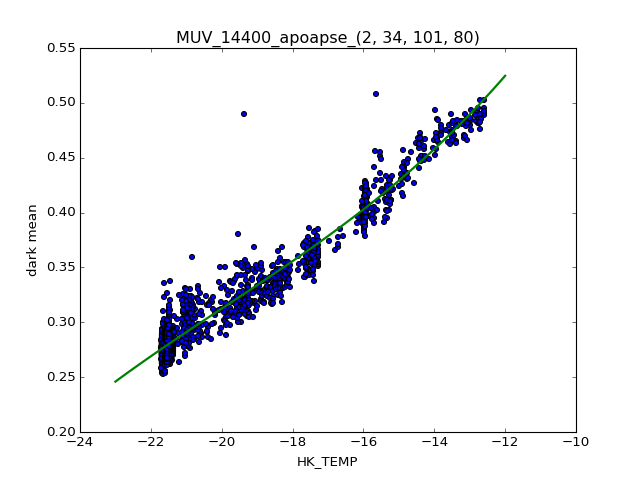

In [68]:
for key, content in g:
    if key != ('MUV', 14400, 'apoapse', (2, 34, 101, 80)):
        continue
    print(key)
    resampled = content[['mean']].resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hkfuvtemp
    else:
        resampled['HK_TEMP'] = hkmuvtemp

    both_there = resampled['HK_TEMP'].notnull() & (resampled['mean'].notnull())
    y = resampled[both_there]['mean']
    x = resampled[both_there]['HK_TEMP']

    print(len(x), len(y))
    spline = UnivariateSpline(x.values, y.values)
    xs = np.linspace(-23, -12, 1000)
    ys = spline(xs)
    
    plt.figure()
    plt.scatter(x, y)
    plt.plot(xs, ys, color='green', lw=2)
    title = '_'.join([str(i) for i in key])
    plt.title(title)
    plt.xlim(-24, -10)
    plt.ylim(0.2, 0.55)
    plt.xlabel('HK_TEMP')
    plt.ylabel('dark mean')
#     print(title)
#     fig, ax = plt.subplots(nrows=2)
#     resampled.plot(kind='scatter', x='DET_TEMP', y='mean', ax=ax[0],
#                  xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' vs DET_TEMP')

#     resampled.plot(kind='scatter', x='HK_TEMP', y='mean', ax=ax[1],
#                  xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' vs HK_TEMP')
#     fig.tight_layout()
#     fig.savefig('plots/'+title+'.png', dpi=150)
#     plt.close(fig)

('MUV', 14400, 'apoapse', (140, 8, 101, 80))


<IPython.core.display.Javascript object>


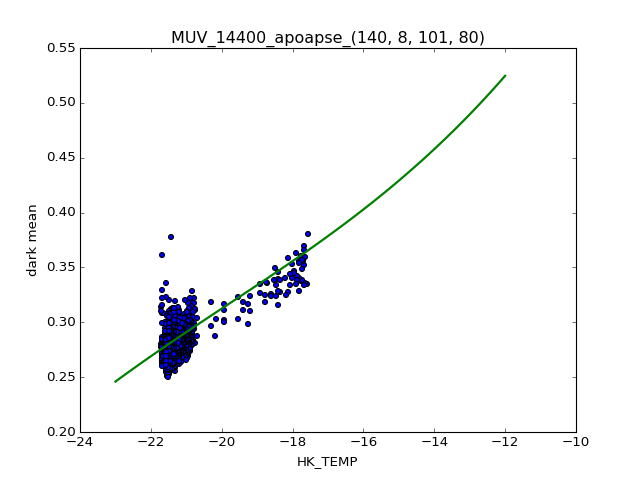

5334 5334


In [69]:
for key, content in g:
    if key != ('MUV', 14400, 'apoapse', (140, 8, 101, 80)):
        continue
    print(key)
    resampled = content[['mean']].resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hkfuvtemp
    else:
        resampled['HK_TEMP'] = hkmuvtemp

    y = resampled['mean'].dropna()
    x = resampled[resampled['mean'].notnull()]['HK_TEMP']
    plt.figure()
    plt.scatter(x, y)
    plt.plot(xs, ys, color='green', lw=2)
    print(len(x), len(y))
    title = '_'.join([str(i) for i in key])
    plt.title(title)
    plt.xlim(-24, -10)
    plt.ylim(0.2, 0.55)
    plt.xlabel('HK_TEMP')
    plt.ylabel('dark mean')




('MUV', 14400, 'apoapse', (0, 4, 101, 80))


<IPython.core.display.Javascript object>


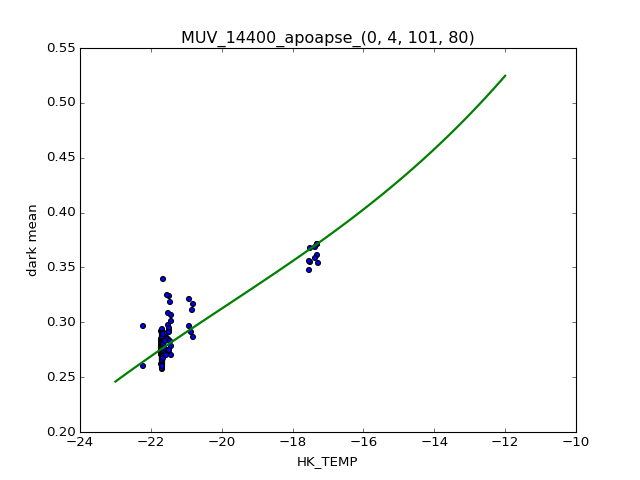

380 380


In [70]:
for key, content in g:
    if key != ('MUV', 14400, 'apoapse', (0, 4, 101, 80)):
        continue
    print(key)
    resampled = content[['mean']].resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hkfuvtemp
    else:
        resampled['HK_TEMP'] = hkmuvtemp

    y = resampled['mean'].dropna()
    x = resampled[resampled['mean'].notnull()]['HK_TEMP']
    plt.figure()
    plt.scatter(x, y)
    plt.plot(xs, ys, color='green', lw=2)
    print(len(x), len(y))
    title = '_'.join([str(i) for i in key])
    plt.title(title)
    plt.xlim(-24, -10)
    plt.ylim(0.2, 0.55)
    plt.xlabel('HK_TEMP')
    plt.ylabel('dark mean')




In [83]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [88]:
yexp = func(xs, 10, 1, 0.2)

<IPython.core.display.Javascript object>


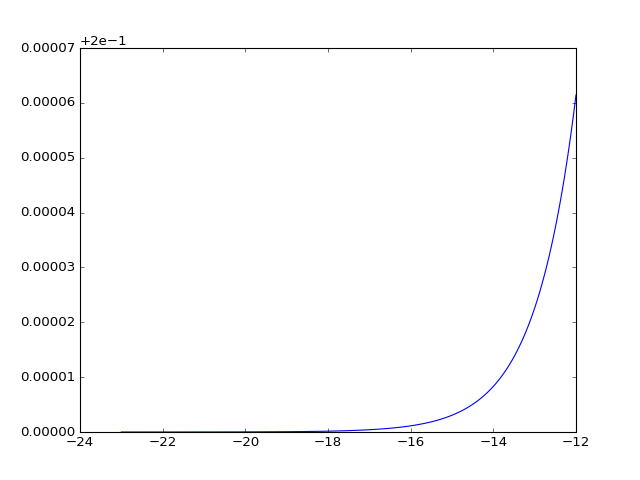

In [89]:
plt.figure()
plt.plot(xs, yexp)

In [79]:
for key, content in g:
    if key != ('FUV', 14400, 'inbound', (52, 4, 89, 115)):
        continue
    print(key)
    resampled = content[['mean']].resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hkfuvtemp
    else:
        resampled['HK_TEMP'] = hkmuvtemp

    both_there = resampled['HK_TEMP'].notnull() & (resampled['mean'].notnull())
    y = resampled[both_there]['mean']
    x = resampled[both_there]['HK_TEMP']

    print(len(x), len(y))
    spline = UnivariateSpline(x.values, y.values)
    xs = np.linspace(-23, -12, 1000)
    ys = spline(xs)
    popt, pcov = curve_fit(func, x, y)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(xs, ys, color='green', lw=2)
    title = '_'.join([str(i) for i in key])
    plt.title(title)
    plt.xlim(-24, -10)
    plt.ylim(0.2, 0.55)
    plt.xlabel('HK_TEMP')
    plt.ylabel('dark mean')
    print(popt, pcov)
#     print(title)
#     fig, ax = plt.subplots(nrows=2)
#     resampled.plot(kind='scatter', x='DET_TEMP', y='mean', ax=ax[0],
#                  xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' vs DET_TEMP')

#     resampled.plot(kind='scatter', x='HK_TEMP', y='mean', ax=ax[1],
#                  xlim=(-25, -11), ylim=(0.1, 1.5), title=title+' vs HK_TEMP')
#     fig.tight_layout()
#     fig.savefig('plots/'+title+'.png', dpi=150)
#     plt.close(fig)

('FUV', 14400, 'inbound', (52, 4, 89, 115))
701 701


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

('FUV', 14400, 'inbound', (52, 8, 89, 115))


<IPython.core.display.Javascript object>


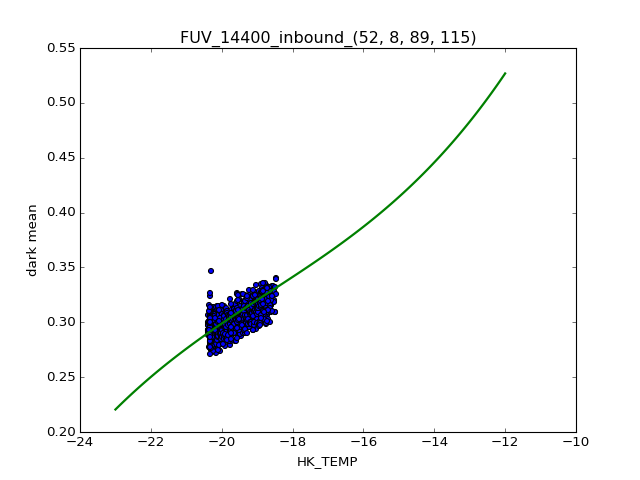

1090 1090


In [74]:
for key, content in g:
    if key != ('FUV', 14400, 'inbound', (52, 8, 89, 115)):
        continue
    print(key)
    resampled = content[['mean']].resample(timeres).dropna(how='all')
    if key[0]=='FUV':
        resampled['HK_TEMP'] = hkfuvtemp
    else:
        resampled['HK_TEMP'] = hkmuvtemp

    y = resampled['mean'].dropna()
    x = resampled[resampled['mean'].notnull()]['HK_TEMP']
    plt.figure()
    plt.scatter(x, y)
    plt.plot(xs, ys, color='green', lw=2)
    print(len(x), len(y))
    title = '_'.join([str(i) for i in key])
    plt.title(title)
    plt.xlim(-24, -10)
    plt.ylim(0.2, 0.55)
    plt.xlabel('HK_TEMP')
    plt.ylabel('dark mean')


In [31]:
type(x)

pandas.core.series.Series

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

/Users/klay6683/miniconda3/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-macosx-10.5-x86_64.egg/matplotlib/__init__.py:866: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


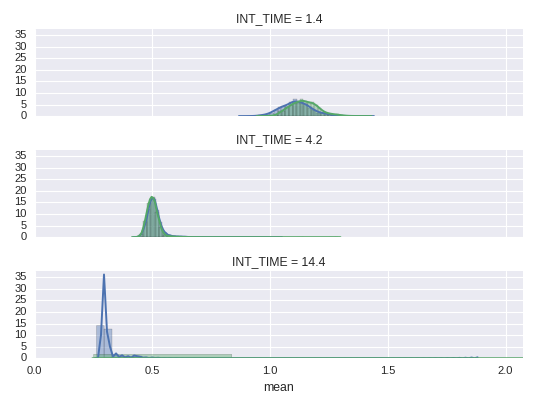

In [57]:
g = sns.FacetGrid(df, row='INT_TIME', hue='CHANNEL', size=1.7, aspect=4,)
g.map(sns.distplot, 'mean')

  max_open_warning, RuntimeWarning)



<IPython.core.display.Javascript object>


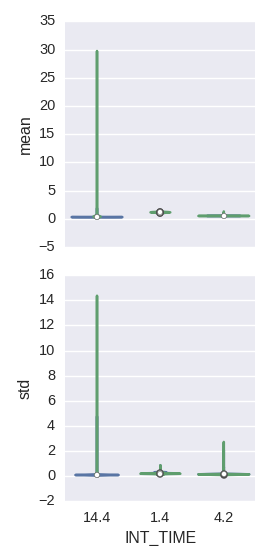

In [187]:
g = sns.PairGrid(df, x_vars=['INT_TIME'], hue='CHANNEL',
                y_vars=['mean','std'], size=3.5)
g.map(sns.violinplot)

In [33]:
df.sort_index(inplace=True)

# Odd things

## Difference between MIRROR_DEG and MIR_DEG

In [80]:
df['mirdeg_delta'] = df.MIRROR_DEG - df.MIR_DEG

<IPython.core.display.Javascript object>


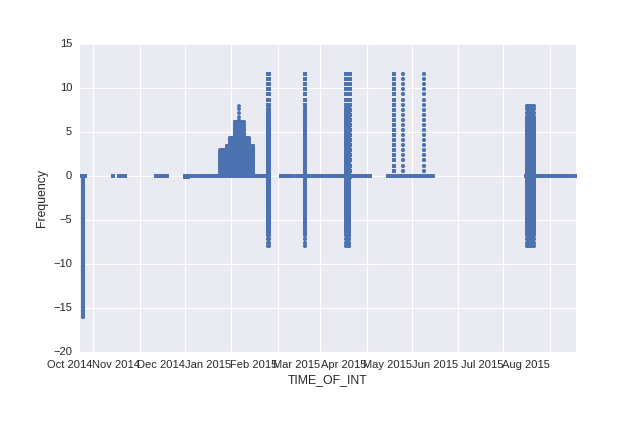

In [81]:
plt.figure()
df.mirdeg_delta.plot(style='.')